In [10]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
file_path = rf'C:\Users\wout.decrop\environments\Imagine\CLAP - Copy - Copy\3_1_Results\2025-02-14_14-44_1_0_0_0_-1.9_0.5\predicted_true_values_2025-02-14_14-44-23_1_0_0_0_-1.9_0.5_results.csv'
# Read the CSV file
df = pd.read_csv(file_path)

# Now you can perform operations on your DataFrame 'df'
# print(df.head())  # Display the first few rows of the DataFrame

split_labels = df['true'].str.split()

# Extract specific elements from the split lists
selected_columns = {
    'ship_type': [label[0] for label in split_labels],
    'distance_category': [label[3] for label in split_labels],
    'speed_category': [label[7] for label in split_labels],
    'activity': [label[9] for label in split_labels]
}

# Create a DataFrame from the selected columns
selected_df = pd.DataFrame(selected_columns)


split_labels_predicted = df['predicted'].str.split()

# Extract specific elements from the split lists
selected_columns_predicted = {
    'ship_type_predicted': [label[0] for label in split_labels_predicted],
    'distance_category_predicted': [label[3] for label in split_labels_predicted],
    'speed_category_predicted': [label[7] for label in split_labels_predicted],
    'activity_predicted': [label[9] for label in split_labels_predicted]
}
selected_df_predicted = pd.DataFrame(selected_columns_predicted)
# Create a DataFrame from the selected columns

In [11]:
df

,filename,distance,speed,ship_type,distance_category,speed_category,activity,embedding,predicted,true,predicted_numbers,true_numbers,timestamp
0,/srv/embeddings_clap/Grafton_28434_test/G_2843...,1674.0,14.0,Cargo,1-2 km,14+,underway-using-engine,/srv/CLAP/files/Test/G_28434_2022-09-13_18-40-...,ship at distance 3-4 km with speed speed_categ...,ship at distance 1-2 km with speed speed_categ...,3,1,2022-09-13-18-40-13
1,/srv/embeddings_clap/GardenCity_15811_test/G_1...,4217.0,13.6,Tanker,4-5 km,5-14,underway-using-engine,/srv/CLAP/files/Test/G_15811_2022-04-24_07-25-...,ship at distance 3-4 km with speed speed_categ...,ship at distance 4-5 km with speed speed_categ...,3,4,2022-04-24-07-25-16
2,/srv/embeddings_clap/Grafton_15810_test/G_1581...,6166.0,1.4,Pilot,6-7 km,0-8,underway-using-engine,/srv/CLAP/files/Test/G_15810_2022-01-22_03-35-...,ship at distance 4-5 km with speed speed_categ...,ship at distance 6-7 km with speed speed_categ...,4,6,2022-01-22-03-35-07
3,/srv/embeddings_clap/Grafton_15810_test/G_1581...,3514.0,2.4,Tanker,3-4 km,0-8,underway-using-engine,/srv/CLAP/files/Test/G_15810_2022-02-07_02-03-...,ship at distance 4-5 km with speed speed_categ...,ship at distance 3-4 km with speed speed_categ...,4,3,2022-02-07-02-03-05
4,/srv/embeddings_clap/GardenCity_15811_test/G_1...,6272.0,7.5,Cargo,6-7 km,0-8,underway-using-engine,/srv/CLAP/files/Test/G_15811_2022-04-24_14-14-...,ship at distance 4-5 km with speed speed_categ...,ship at distance 6-7 km with speed speed_categ...,4,6,2022-04-24-14-14-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,/srv/embeddings_clap/Grafton_15810_test/G_1581...,4006.0,13.1,Tanker,4-5 km,5-14,underway-using-engine,/srv/CLAP/files/Test/G_15810_2022-04-18_16-32-...,ship at distance 4-5 km with speed speed_categ...,ship at distance 4-5 km with speed speed_categ...,4,4,2022-04-18-16-32-23
2743,/srv/embeddings_clap/Grafton_15810_test/G_1581...,3769.0,10.4,Cargo,3-4 km,5-14,underway-using-engine,/srv/CLAP/files/Test/G_15810_2022-02-07_22-40-...,ship at distance 4-5 km with speed speed_categ...,ship at distance 3-4 km with speed speed_categ...,4,3,2022-02-07-22-40-33
2744,/srv/embeddings_clap/Grafton_15810_test/G_1581...,6726.0,0.7,Pilot,6-7 km,0-8,moored,/srv/CLAP/files/Test/G_15810_2022-04-18_09-12-...,ship at distance 5-6 km with speed speed_categ...,ship at distance 6-7 km with speed speed_categ...,5,6,2022-04-18-09-12-37
2745,/srv/embeddings_clap/GardenCity_15811_test/G_1...,2542.0,0.8,Fishing,2-3 km,0-8,engaged-in-fishing,/srv/CLAP/files/Test/G_15811_2022-05-10_14-19-...,ship at distance 3-4 km with speed speed_categ...,ship at distance 2-3 km with speed speed_categ...,3,2,2022-05-10-14-19-26


In [12]:
# Extract station (e.g., Grafton) and deployment ID (e.g., 28434)
df['station'] = df['filename'].str.extract(r'/([^/_]+)_\d+_test/')
df['deployment'] = df['filename'].str.extract(r'_(\d+)_\d{4}-\d{2}-\d{2}_')  # or use r'_(\d+)_test/'

# Convert deployment to int (optional)
df['deployment'] = df['deployment'].astype(int)

print(df[['station', 'deployment']])

         station  deployment
0        Grafton       28434
1     GardenCity       15811
2        Grafton       15810
3        Grafton       15810
4     GardenCity       15811
...          ...         ...
2742     Grafton       15810
2743     Grafton       15810
2744     Grafton       15810
2745  GardenCity       15811
2746     Grafton       15810

[2747 rows x 2 columns]


In [13]:
df = df[['predicted_numbers', 'true_numbers', 'timestamp', 'station', 'deployment']]


In [14]:
df = df[['predicted_numbers', 'true_numbers', 'timestamp', 'station', 'deployment']]


In [15]:
import pandas as pd

metadata = [
    # depth, lat, lon, start_date, end_date, station
    [15810, 51.40647, 2.8185,  "2022-01-19", "2022-05-11", "bpns-Grafton"],
    [29187, 51.40666, 2.819,   "2022-10-28", "2022-11-08", "bpns-Grafton"],
    [15811, 51.48645, 2.304829, "2022-01-20", "2022-05-23", "bpns-GardenCity"],
    [26981, 51.48645, 2.304829, "2022-06-22", "2022-07-01", "bpns-GardenCity"],
    [28434, 51.40666667, 2.819, "2022-08-20", "2022-10-27", "bpns-Grafton"]
]

metadata_df = pd.DataFrame(metadata, columns=[
    'depth', 'latitude', 'longitude', 'start_date', 'end_date', 'station'
])

# Format the deployment period
metadata_df['deployment_period'] = pd.to_datetime(metadata_df['start_date']).dt.strftime('%m/%Y') + '–' + pd.to_datetime(metadata_df['end_date']).dt.strftime('%m/%Y')
from sklearn.metrics import mean_squared_error
import numpy as np

total_rows = len(df)

rmse_deployment = (
    df.groupby('deployment')
      .apply(lambda g: pd.Series({
          'rmse': round(np.sqrt(mean_squared_error(g['true_numbers'], g['predicted_numbers'])), 3),
          'proportion': round(len(g) / total_rows, 3),
          'station': g['station'].iloc[0]  # needed for merge
      }))
      .reset_index()
)

# Ensure deployment ID in metadata is int
metadata_df['deployment'] = metadata_df['depth']  # Match on this
metadata_df['station'] = metadata_df['station'].str.replace('bpns-', '', regex=False)

# Merge on deployment and station
merged = pd.merge(rmse_deployment, metadata_df, on=['deployment', 'station'], how='left')

# Select and rename columns
summary = merged[['station', 'deployment_period', 'rmse', 'proportion', 'depth', 'latitude', 'longitude']]


# Set depth based on station name
summary.loc[summary['station'] == 'GardenCity', 'depth'] = '35m'
summary.loc[summary['station'] == 'Grafton', 'depth'] = '23m'

print(summary)


      station deployment_period   rmse  proportion depth   latitude  longitude
0     Grafton   01/2022–05/2022  1.239       0.350   23m  51.406470   2.818500
1  GardenCity   01/2022–05/2022  2.164       0.438   35m  51.486450   2.304829
2     Grafton   08/2022–10/2022  1.211       0.107   23m  51.406667   2.819000
3     Grafton   10/2022–11/2022  1.283       0.105   23m  51.406660   2.819000


C:\Users\wout.decrop\AppData\Local\Temp\ipykernel_10944\784636657.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({
C:\Users\wout.decrop\AppData\Local\Temp\ipykernel_10944\784636657.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '35m' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  summary.loc[summary['station'] == 'GardenCity', 'depth'] = '35m'


In [16]:
latex_table = summary.to_latex(index=False,
                               caption="Summary of deployment RMSE and metadata",
                               label="tab:deployment_summary",
                               float_format="%.3f",
                               column_format="lllllll",
                               longtable=False)  # Change to True if you want longtable environment

print(latex_table)


\begin{table}
\caption{Summary of deployment RMSE and metadata}
\label{tab:deployment_summary}
\begin{tabular}{lllllll}
\toprule
station & deployment_period & rmse & proportion & depth & latitude & longitude \\
\midrule
Grafton & 01/2022–05/2022 & 1.239 & 0.350 & 23m & 51.406 & 2.818 \\
GardenCity & 01/2022–05/2022 & 2.164 & 0.438 & 35m & 51.486 & 2.305 \\
Grafton & 08/2022–10/2022 & 1.211 & 0.107 & 23m & 51.407 & 2.819 \\
Grafton & 10/2022–11/2022 & 1.283 & 0.105 & 23m & 51.407 & 2.819 \\
\bottomrule
\end{tabular}
\end{table}



In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error

total_rows = len(df)

rmse_deployment = (
    df.groupby('deployment')
      .apply(lambda g: pd.Series({
          'rmse': round(np.sqrt(mean_squared_error(g['true_numbers'], g['predicted_numbers'])), 3),
          'proportion': round(len(g) / total_rows, 3)
      }))
      .reset_index()
)
rmse_station = (
    df.groupby('station')
      .apply(lambda g: pd.Series({
          'rmse': round(np.sqrt(mean_squared_error(g['true_numbers'], g['predicted_numbers'])), 3),
          'proportion': round(len(g) / total_rows, 3)
      }))
      .reset_index()
)

print("RMSE per deployment:")
print(rmse_deployment)

print("\nRMSE per station:")
print(rmse_station)




RMSE per deployment:
   deployment   rmse  proportion
0       15810  1.239       0.350
1       15811  2.164       0.438
2       28434  1.211       0.107
3       29187  1.283       0.105

RMSE per station:
      station   rmse  proportion
0  GardenCity  2.164       0.438
1     Grafton  1.242       0.562


C:\Users\wout.decrop\AppData\Local\Temp\ipykernel_10944\847494308.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({
C:\Users\wout.decrop\AppData\Local\Temp\ipykernel_10944\847494308.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


Accuracy for distance_category: 0.30578813250819076


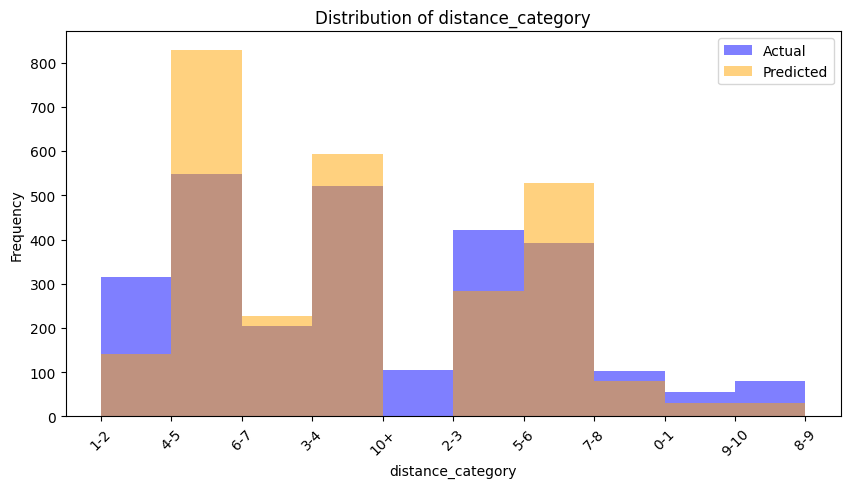

In [19]:
from sklearn.metrics import accuracy_score

# Define the categories
categories = [ 'distance_category'] #, 'speed_category']

# Calculate accuracy for each category
for category in categories:
    actual_values = selected_df[category]
    predicted_values = selected_df_predicted[category + '_predicted']  # Adjust column name for predicted values
    
    accuracy = accuracy_score(actual_values, predicted_values)
    
    print(f"Accuracy for {category}: {accuracy}")

    # Create histograms for actual and predicted values
    plt.figure(figsize=(10, 5))
    plt.hist(actual_values, alpha=0.5, label='Actual', color='blue', align='mid')
    plt.hist(predicted_values, alpha=0.5, label='Predicted', color='orange', align='mid')
    plt.xlabel(category)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {category}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


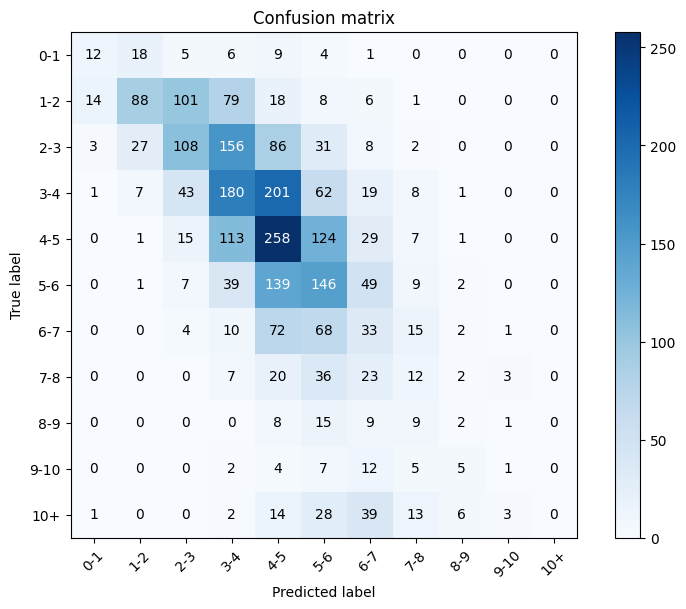

Mean Squared Error: 2.7613760465962867
Root Mean Squared Error (RMSE): 1.6617388623355616 km


In [22]:
# Define the plot_confusion_matrix function
from sklearn.metrics import mean_squared_error
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# Define the mapping
def map_category_to_number(category):
    if category == "10+":
        return 10
    else:
        lower, upper = map(int, category.split('-'))
        return (lower + upper) / 2
# Calculate confusion matrix for each category
for category in categories:
    actual_values = selected_df[category]
    predicted_values = selected_df_predicted[category + '_predicted']  # Adjust column name for predicted values
    
    # Compute confusion matrix
    labels=sorted(set(actual_values) | set(predicted_values))
    if category=="distance_category":
        labels.sort(key=lambda x: float(x.split('-')[0]) if x != '10+' else float('inf'))
    cm = confusion_matrix(actual_values, predicted_values, labels=labels)


    plot_confusion_matrix(cm, classes=labels)
    # Apply the mapping
    actual_numeric = actual_values.apply(map_category_to_number)
    predicted_numeric = predicted_values.apply(map_category_to_number)
    
    # Calculate the MSE
    mse = mean_squared_error(actual_numeric, predicted_numeric)
    print(f"Mean Squared Error: {mse}")
    import numpy as np
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE): {rmse} km")





In [23]:
conf_matrix=cm

Text(0, 0.5, 'Error Rate')

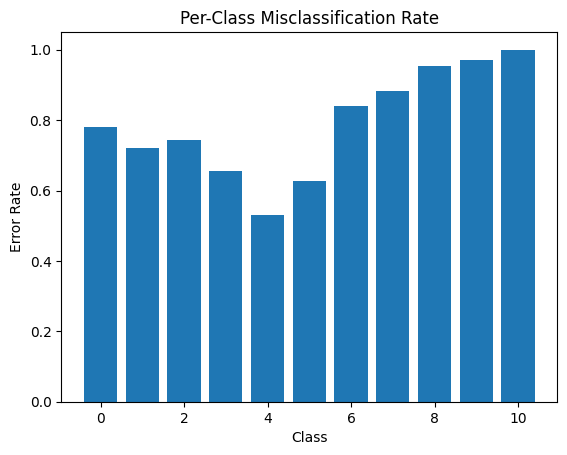

In [24]:
import numpy as np
import matplotlib.pyplot as plt

errors = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
support = conf_matrix.sum(axis=1)
error_rate = errors / support

plt.bar(range(len(error_rate)), error_rate)
plt.title("Per-Class Misclassification Rate")
plt.xlabel("Class")
plt.ylabel("Error Rate")


In [25]:
cm

array([[ 12,  18,   5,   6,   9,   4,   1,   0,   0,   0,   0],
       [ 14,  88, 101,  79,  18,   8,   6,   1,   0,   0,   0],
       [  3,  27, 108, 156,  86,  31,   8,   2,   0,   0,   0],
       [  1,   7,  43, 180, 201,  62,  19,   8,   1,   0,   0],
       [  0,   1,  15, 113, 258, 124,  29,   7,   1,   0,   0],
       [  0,   1,   7,  39, 139, 146,  49,   9,   2,   0,   0],
       [  0,   0,   4,  10,  72,  68,  33,  15,   2,   1,   0],
       [  0,   0,   0,   7,  20,  36,  23,  12,   2,   3,   0],
       [  0,   0,   0,   0,   8,  15,   9,   9,   2,   1,   0],
       [  0,   0,   0,   2,   4,   7,  12,   5,   5,   1,   0],
       [  1,   0,   0,   2,  14,  28,  39,  13,   6,   3,   0]],
      dtype=int64)

In [26]:
import numpy as np

cm = np.array([[12, 18, 5, 6, 9, 4, 1, 0, 0, 0, 0],
               [14, 88, 101, 79, 18, 8, 6, 1, 0, 0, 0],
               [3, 27, 108, 156, 86, 31, 8, 2, 0, 0, 0],
               [1, 7, 43, 180, 201, 62, 19, 8, 1, 0, 0],
               [0, 1, 15, 113, 258, 124, 29, 7, 1, 0, 0],
               [0, 1, 7, 39, 139, 146, 49, 9, 2, 0, 0],
               [0, 0, 4, 10, 72, 68, 33, 15, 2, 1, 0],
               [0, 0, 0, 7, 20, 36, 23, 12, 2, 3, 0],
               [0, 0, 0, 0, 8, 15, 9, 9, 2, 1, 0],
               [0, 0, 0, 2, 4, 7, 12, 5, 5, 1, 0],
               [1, 0, 0, 2, 14, 28, 39, 13, 6, 3, 0]])

n_classes = cm.shape[0]
rmse_per_class = []

for i in range(n_classes):
    total = cm[i].sum()
    if total == 0:
        rmse = 0
    else:
        squared_diffs = [(j - i)**2 * cm[i, j] for j in range(n_classes)]
        rmse = np.sqrt(sum(squared_diffs) / total)
    rmse_per_class.append(rmse)

for i, rmse in enumerate(rmse_per_class):
    print(f"Class {i}: RMSE = {rmse:.2f}")


Class 0: RMSE = 2.60
Class 1: RMSE = 1.70
Class 2: RMSE = 1.54
Class 3: RMSE = 1.28
Class 4: RMSE = 0.96
Class 5: RMSE = 1.10
Class 6: RMSE = 1.63
Class 7: RMSE = 2.14
Class 8: RMSE = 2.65
Class 9: RMSE = 3.40
Class 10: RMSE = 4.52
